#### Importing Required packages

In [1]:

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from pandas_ml import ConfusionMatrix
import pandas_ml as pdml
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import random

#### Reading the data

In [2]:
def read_input():
    train = pd.read_csv("creditcard.csv")
    #train = train.sample(frac=1).reset_index(drop=True)
    return train

In [3]:
train = read_input()
train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Checking for null values

In [4]:
train.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
frauds = train.loc[train['Class'] == 1]
no_frauds = train.loc[train['Class'] == 0]
print("Frauds:",len(frauds))
print("No Frauds:",len(no_frauds))

Frauds: 492
No Frauds: 284315


## Exploratory Data Analysis(EDA)

Text(0,0.5,'Frequency')

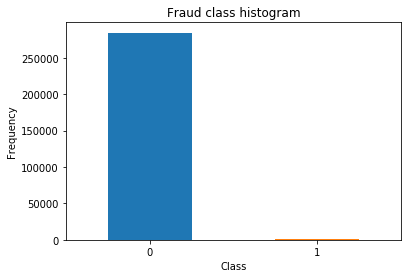

In [131]:
count_classes = pd.value_counts(train['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar',rot=0)
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

Checking the amount for which fraud transaction occured


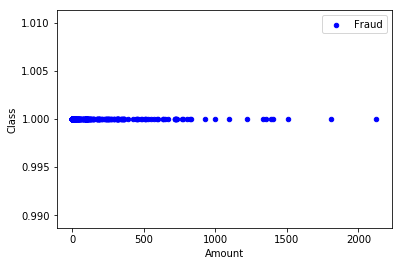

In [6]:
bx = frauds.plot.scatter(x='Amount', y='Class', color='Blue', label='Fraud')
print("Checking the amount for which fraud transaction occured")
plt.show()

#### Plotting fraud and non-fraud trasactions with respect to amount

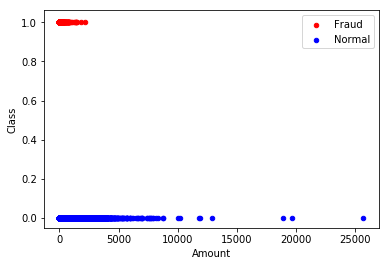

In [7]:
ax = frauds.plot.scatter(x='Amount', y='Class', c='Red', label='Fraud')
no_frauds.plot.scatter(x='Amount', y='Class', c='Blue', label='Normal', ax=ax)
plt.show()

By looking at the above plot we can conclude that data is very imbalanced as there are very few data points for class 1(fraud)

### Plotting correlation of all the data 

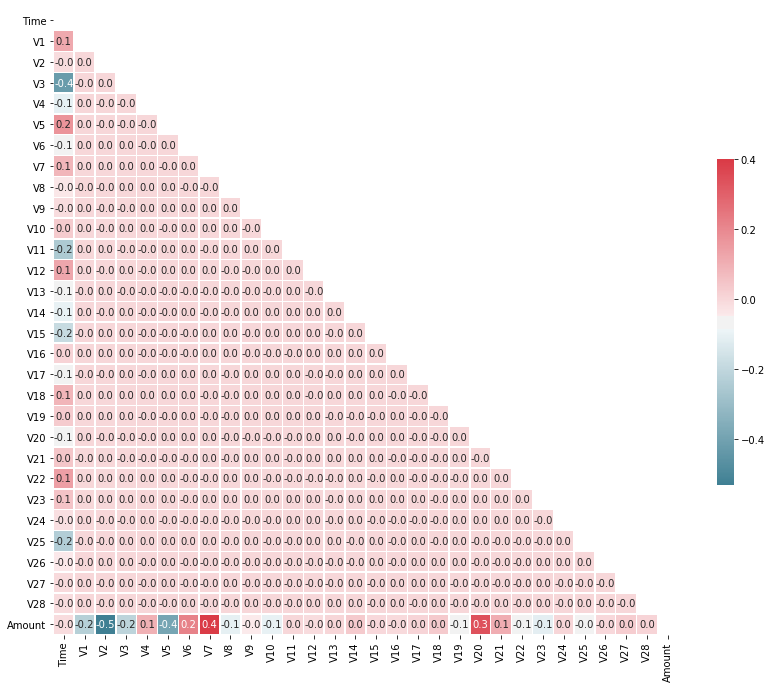

In [84]:
#Compute correlation matrix
corr = train.drop(['Class'], axis=1).corr()
get_ipython().magic(u'matplotlib inline')

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] =True


f, ax = plt.subplots(figsize=(14, 12))


cmap= sns.diverging_palette(220, 10, as_cmap= True)



sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.4,
            square=True, xticklabels=1, yticklabels=1,
            linewidths=0.4,fmt= '.1f', cbar_kws={"shrink": 0.5}, ax=ax,annot = True)

## KDE plots of all features (for feature selection) 

Drawing kde plots of all the features for both classes 0 and 1.If the graph is same then that particular feature is not helping in classifying the data correctly. So remove all such features


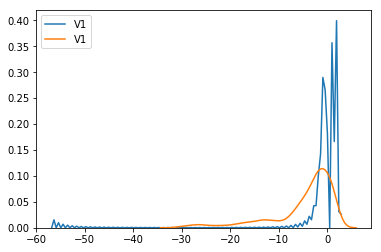

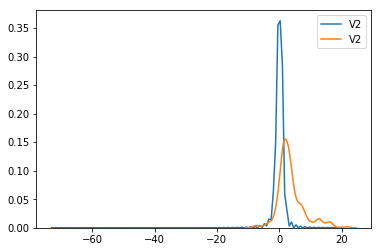

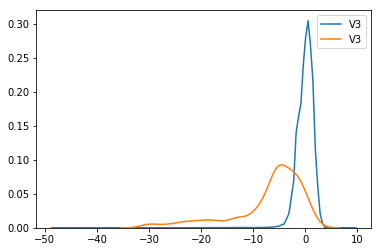

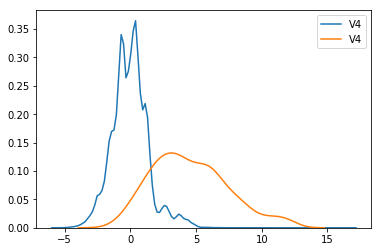

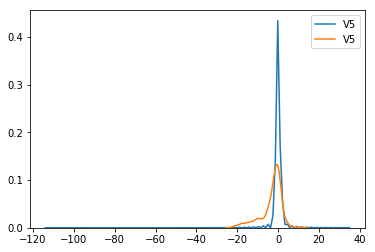

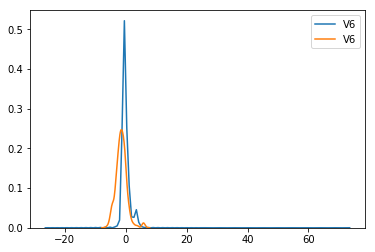

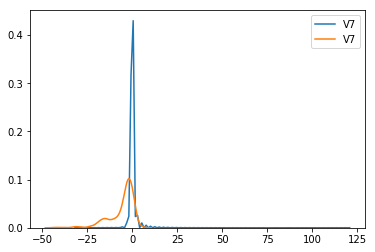

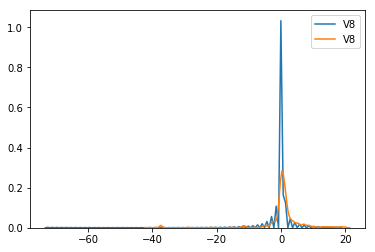

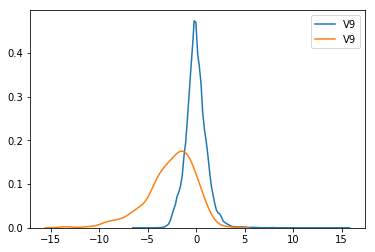

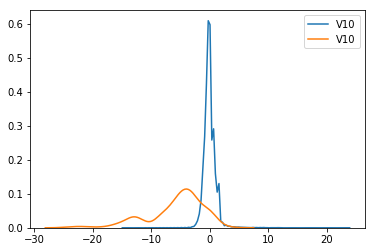

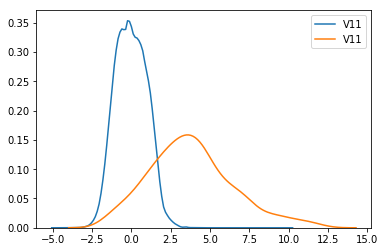

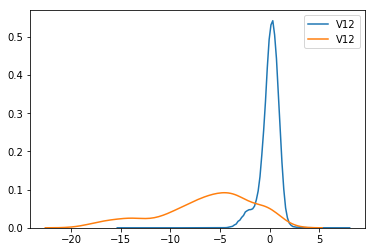

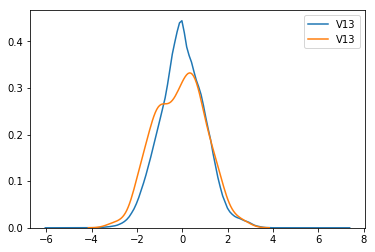

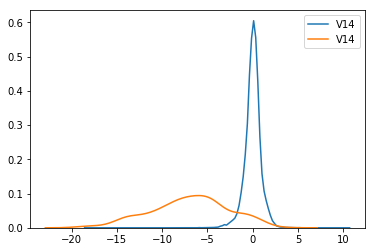

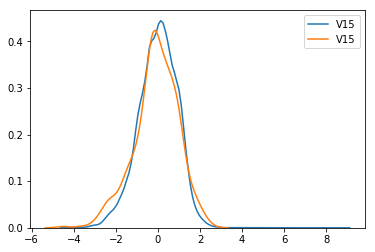

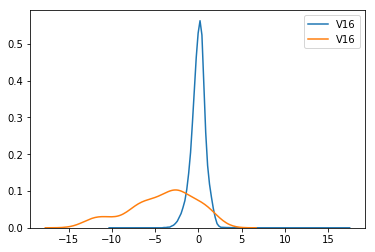

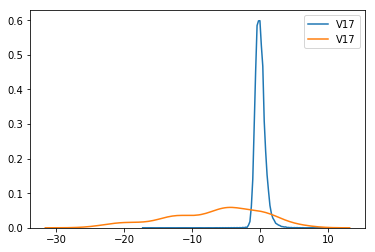

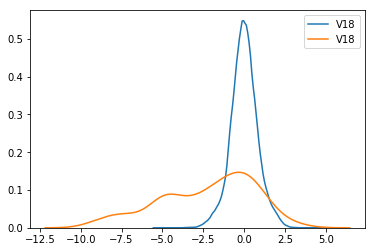

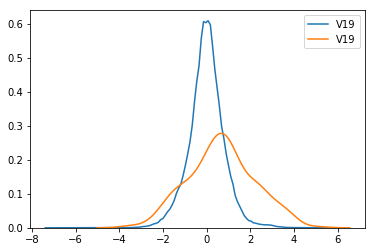

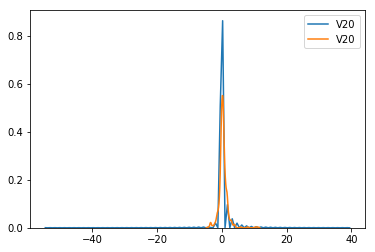

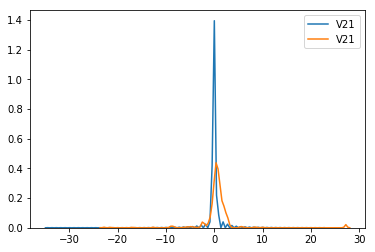

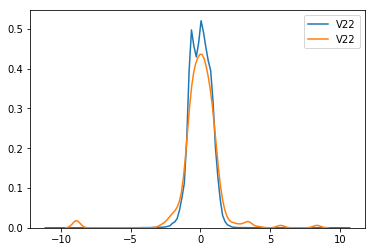

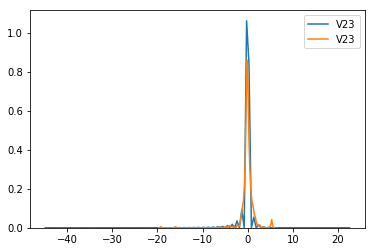

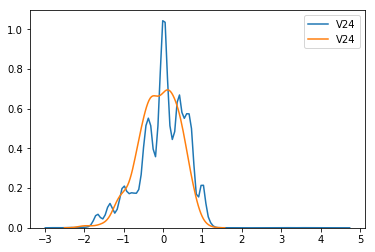

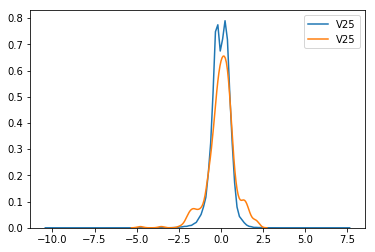

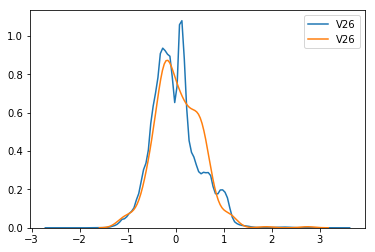

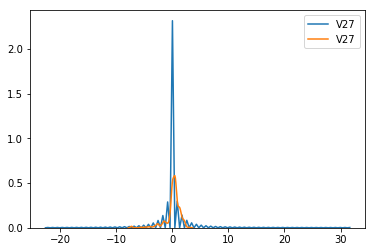

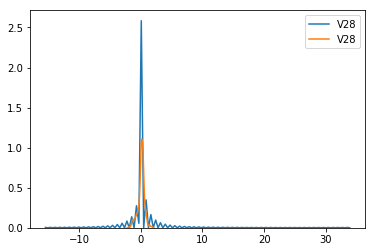

In [33]:
for j in list(train):
    for i in range(2):
        if(j in ('Time','Amount','Class')):
            continue
        else:
            sns.kdeplot(train[train.Class==i][j])
    plt.show()

 keep the following features with time and amount:
 V1, V3, V4, V7, V9, V10, V11, V12, V14, V16, V17, V18, V19

In [168]:
features = ['Time','V1','V3','V4','V7','V9','V10','V11','V12','V14','V16','V17','V18','V19','Amount']

### Splitting the dataset into train, test

In [169]:

X = train[features]
y = train["Class"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.5,random_state = 123)
print(X_train.shape)
print(X_test.shape)


(142403, 15)
(142404, 15)


Printing the size of fraud and non-fraud data in train and test set 

In [170]:
print("Train and test sizes, respectively:", len(X_train), len(y_train), "|", len(X_test), len(y_test))
print("Total number of frauds:", len(y.loc[train['Class'] == 1]), len(y.loc[train['Class'] == 1])/len(y))
print("Number of frauds on y_test:", len(y_test.loc[train['Class'] == 1]), " and  % =",len(y_test.loc[train['Class'] == 1]) / len(y_test))
print("Number of frauds on y_train:", len(y_train.loc[train['Class'] == 1])," and  % =" ,len(y_train.loc[train['Class'] == 1])/len(y_train))


Train and test sizes, respectively: 142403 142403 | 142404 142404
Total number of frauds: 492 0.001727485630620034
Number of frauds on y_test: 257  and  % = 0.0018047245863880227
Number of frauds on y_train: 235  and  % = 0.0016502461324550746


## Using Logistic regression without Oversampling 

In [171]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Pickling the model 

In [172]:
import pickle
filename = 'basic_LR.sav'
pickle.dump(lr, open(filename, 'wb'))

In [173]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9990730597455127


In [174]:
y_predicted = np.array(lr.predict(X_test))
y_right = np.array(y_test)
print("Score :",lr.score(X_test,y_test))

Score : 0.9990730597455127


### Plotting confusion matrix 

Confusion matrix:
Predicted   False  True  __all__
Actual                          
False      142118    29   142147
True          103   154      257
__all__    142221   183   142404


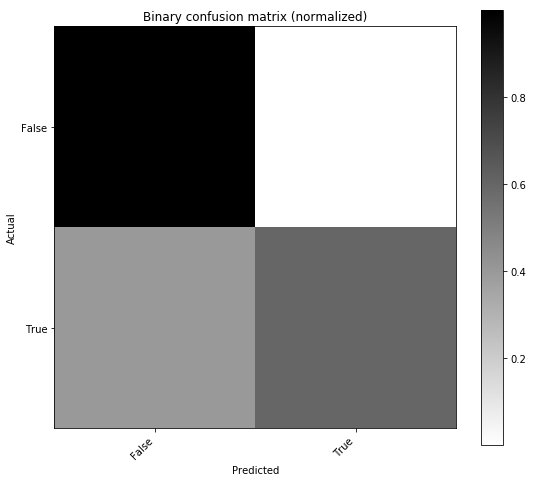

In [175]:

confusion_matrix = ConfusionMatrix(y_right, y_predicted)
print("Confusion matrix:\n%s" % confusion_matrix)
confusion_matrix.plot(normalized=True)
plt.show()

In [176]:
confusion_matrix.print_stats()

population: 142404
P: 257
N: 142147
PositiveTest: 183
NegativeTest: 142221
TP: 154
TN: 142118
FP: 29
FN: 103
TPR: 0.5992217898832685
TNR: 0.9997959858456387
PPV: 0.8415300546448088
NPV: 0.9992757750261916
FPR: 0.00020401415436133017
FDR: 0.15846994535519127
FNR: 0.40077821011673154
ACC: 0.9990730597455127
F1_score: 0.7
MCC: 0.7096884090285123
informedness: 0.5990177757289072
markedness: 0.8408058296710004
prevalence: 0.0018047245863880227
LRP: 2937.157922984033
LRN: 0.4008599912288594
DOR: 7327.141613659189
FOR: 0.0007242249738083687


### Percentage of  Fraud Trasaction which model detected incorrectly 

In [177]:
print("FNR is {0}".format(confusion_matrix.stats()['FNR']))

FNR is 0.40077821011673154


#### Plotting ROC curve 

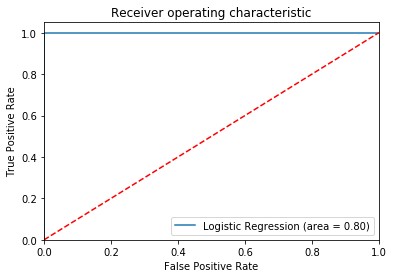

In [178]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_predicted, lr.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

   ## Using SMOTE For Over Sampling

In [179]:
train2 = pdml.ModelFrame(X_train, target=y_train)
sampler = train2.imbalance.over_sampling.SMOTE()
sampler

SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
   out_step='deprecated', random_state=None, ratio=None,
   sampling_strategy='auto', svm_estimator='deprecated')

In [180]:
sampled = train2.fit_sample(sampler)
sampled.head()

,Class,Time,V1,V3,V4,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,Amount
0,0,136847.0,-1.376493,-3.218960,-2.255929,0.327045,-0.319406,0.018306,-0.374592,0.230276,1.346671,-0.557530,-0.173824,-0.474698,-0.359137,1.43
1,0,59671.0,1.343429,-0.164910,-0.971213,-0.524447,-0.994598,0.826877,-0.013304,0.031075,0.237154,-0.572128,-0.809466,1.820529,0.026201,59.85
2,0,44923.0,1.212028,0.685187,-1.393421,-1.328216,-1.800440,1.517265,1.324005,-0.378640,-0.156842,-0.209264,0.429910,0.433068,-0.539400,116.00
3,0,165630.0,2.098878,0.156422,-0.943323,-1.914603,0.752716,0.919158,0.017994,-1.112953,-0.265290,2.097152,-0.396123,0.242977,0.663040,11.99
4,0,19914.0,1.352862,0.652703,-0.355969,-0.795912,0.693960,0.311084,1.926494,-2.543894,1.310878,0.778182,1.203583,-0.910266,1.030766,10.00


In [181]:
print("Size of training set after over sampling:", len(sampled))

Size of training set after over sampling: 284336


## Using Logistic regression with Oversampling 

In [182]:
X_train_sampled = sampled.iloc[:,1:]
y_train_sampled = sampled['Class']


logistic = LogisticRegression()
logistic.fit(X_train_sampled, y_train_sampled)
print("Score: ", logistic.score(X_test, y_test))

Score:  0.9812083930226679


In [51]:
filename = 'Over_Sampled_LR.sav'
pickle.dump(logistic, open(filename, 'wb'))

### Plotting Confusion matrix

Confusion matrix:
Predicted   False  True  __all__
Actual                          
False      137999  4148   142147
True           26   231      257
__all__    138025  4379   142404


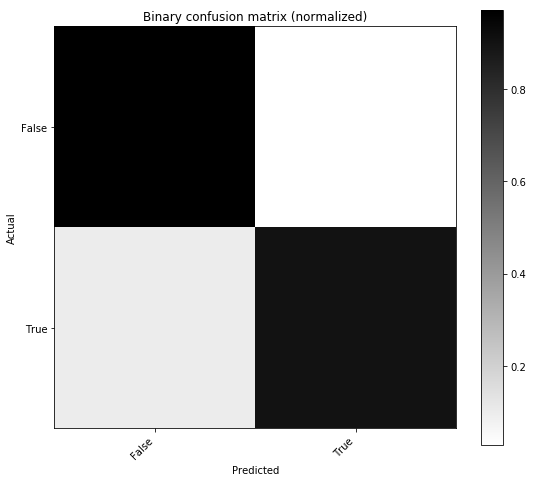

In [146]:
y_predicted1 = np.array(logistic.predict(X_test))
y_right1 = np.array(y_test)

confusion_matrix1 = ConfusionMatrix(y_right1, y_predicted1)
print("Confusion matrix:\n%s" % confusion_matrix1)
confusion_matrix1.plot(normalized=True)
plt.show()

In [147]:
confusion_matrix1.print_stats()

population: 142404
P: 257
N: 142147
PositiveTest: 4379
NegativeTest: 138025
TP: 231
TN: 137999
FP: 4148
FN: 26
TPR: 0.8988326848249028
TNR: 0.9708189409554897
PPV: 0.05275176981045901
NPV: 0.9998116283282014
FPR: 0.02918105904451026
FDR: 0.947248230189541
FNR: 0.10116731517509728
ACC: 0.9706890255891688
F1_score: 0.0996548748921484
MCC: 0.21380328493226686
informedness: 0.8696516257803926
markedness: 0.0525633981386604
prevalence: 0.0018047245863880227
LRP: 30.80192132348251
LRN: 0.10420822143779704
DOR: 295.5805300051925
FOR: 0.00018837167179858722


In [148]:
print("FNR is {0}".format(confusion_matrix1.stats()['FNR']))

FNR is 0.10116731517509728


### Plotting ROC curve

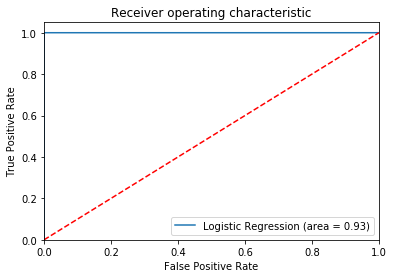

In [149]:
logit_roc_auc = roc_auc_score(y_test, logistic.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_predicted1, logistic.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Logistic regression with balanced class weight  

In [150]:
best_c, best_fnr = 1, 1
for i in range(20):
    print()
    print("values for round ",(i+1))
    c = random.uniform(0, 1)
    logist = LogisticRegression(C=c, class_weight="balanced")
    logist.fit(X_train_sampled, y_train_sampled)
    print("Score: ", logist.score(X_test, y_test))
    y_predicted2 = np.array(logist.predict(X_test))
    y_right2 = np.array(y_test)
    confusion_matrix2 = ConfusionMatrix(y_right2, y_predicted2)
   
    fnr = confusion_matrix2.stats()['FNR']
    print("FNR is {0}".format(confusion_matrix1.stats()['FNR']))
    if fnr < best_fnr:
        best_fnr = fnr
        best_c = c
print("Best C is {0} with best FNR of {1}.".format(best_c, best_fnr))


values for round  1
Score:  0.9706890255891688
FNR is 0.10116731517509728

values for round  2
Score:  0.9706890255891688
FNR is 0.10116731517509728

values for round  3
Score:  0.9707030701384792
FNR is 0.10116731517509728

values for round  4
Score:  0.970696047863824
FNR is 0.10116731517509728

values for round  5
Score:  0.9706890255891688
FNR is 0.10116731517509728

values for round  6
Score:  0.9706890255891688
FNR is 0.10116731517509728

values for round  7
Score:  0.9706890255891688
FNR is 0.10116731517509728

values for round  8
Score:  0.9706890255891688
FNR is 0.10116731517509728

values for round  9
Score:  0.970696047863824
FNR is 0.10116731517509728

values for round  10
Score:  0.970696047863824
FNR is 0.10116731517509728

values for round  11
Score:  0.970696047863824
FNR is 0.10116731517509728

values for round  12
Score:  0.970696047863824
FNR is 0.10116731517509728

values for round  13
Score:  0.9707030701384792
FNR is 0.10116731517509728

values for round  14
Scor

In [151]:
print(best_c)

0.9309997166219455


In [152]:
logist1 = LogisticRegression(C=best_c, class_weight="balanced")
logist1.fit(X_train_sampled, y_train_sampled)
print("Score: ", logist1.score(X_test, y_test))
filename = 'Over_Sampled_LR_with_balanced_class_weight.sav'
pickle.dump(logist1, open(filename, 'wb'))
y_predicted1 = np.array(logistic.predict(X_test))
y_right1 = np.array(y_test)

Score:  0.9706890255891688


Confusion matrix:
Predicted   False  True  __all__
Actual                          
False      137999  4148   142147
True           26   231      257
__all__    138025  4379   142404


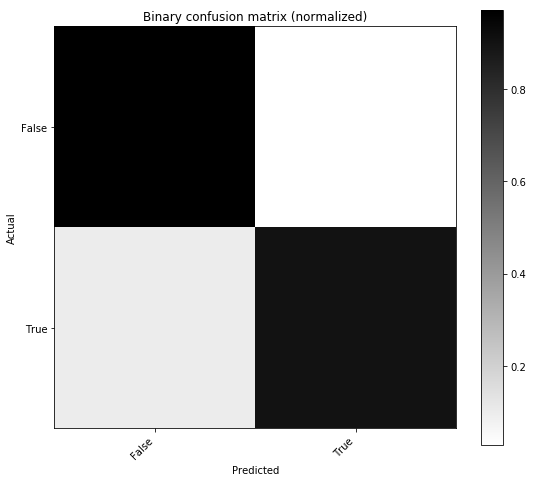

In [153]:
y_predicted1 = np.array(logistic.predict(X_test))
y_right1 = np.array(y_test)

confusion_matrix1 = ConfusionMatrix(y_right1, y_predicted1)
print("Confusion matrix:\n%s" % confusion_matrix1)
confusion_matrix1.plot(normalized=True)
plt.show()

In [154]:
print("FNR is {0}".format(confusion_matrix1.stats()['FNR']))

FNR is 0.10116731517509728


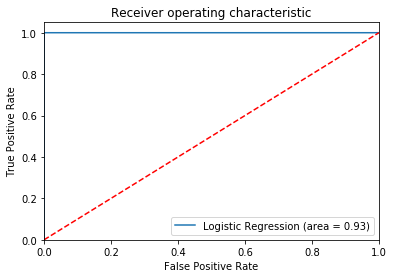

In [155]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logist1.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_predicted1, logist1.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()